# Figure 4

We use a power-transform to estimate the shape of the nonlinear
shape of the genotype-phenotype map.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.stats import pearson
from epistasis import plot
from epistasis.models.nonlinear.power import EpistasisPowerTransform

## Data set I

{'A': 1.1093715178448267, 'B': -0.74772322447721207, 'lmbda': -0.072916389676942361}


(<matplotlib.figure.Figure at 0x10cba5390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10cee4e48>)

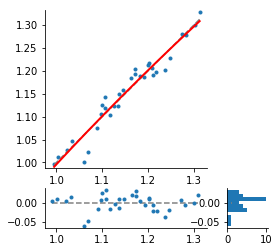

In [15]:
# Path to dataset
dataset = "khan"
path_data = "../datasets/" + dataset + ".json"

model = EpistasisPowerTransform.from_json(path_data, order=1, fix_linear=True, model_type="global")
model.fit(lmbda=-1, A=0, B=0)
print(model.parameters())

################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
plot.corr(model.predict_linear(), model.gpm.phenotypes, fig=fig, ax=ax_c)
# Add fitted model to plot
xmodel = np.linspace(min(model.predict_linear()), max(model.predict_linear()), 1000)
ymodel = model.function(xmodel, *model.parameters.get_params())
ax_c.plot(xmodel, ymodel, '-r', linewidth=2)

### residuals
plot.resid(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_r)

### histogram
plot.rhist(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_h)

# Data set II

{'A': 0.68199946231120867, 'B': -0.60783159905054251, 'lmbda': -4.2746458163945737}


(<matplotlib.figure.Figure at 0x10c5bfe10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10cc2c240>)

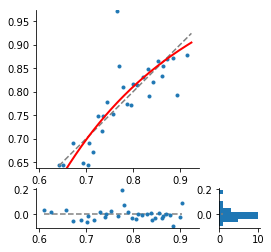

In [14]:
# Path to dataset
dataset = "krug1"
path_data = "../datasets/" + dataset + ".json"

model = EpistasisPowerTransform.from_json(path_data, order=1, fix_linear=True, model_type="global")
model.fit(lmbda=-.1, A=1, B=0)
print(model.parameters())

################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
plot.corr(model.predict_linear(), model.gpm.phenotypes, fig=fig, ax=ax_c)
# Add fitted model to plot
xmodel = np.linspace(min(model.predict_linear()), max(model.predict_linear()), 1000)
ymodel = model.function(xmodel, *model.parameters.get_params())
ax_c.plot(xmodel, ymodel, '-r', linewidth=2)

### residuals
plot.resid(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_r)

### histogram
plot.rhist(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_h)

{'A': 21.658164170750275, 'B': 0.95820683387953898, 'lmbda': 226.4726824168965}


/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:12: RuntimeWarning: overflow encountered in power
  first = (x+A)**lmbda
/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:13: RuntimeWarning: overflow encountered in double_scalars
  out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:13: RuntimeWarning: invalid value encountered in true_divide
  out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B


(<matplotlib.figure.Figure at 0x10cc31be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d07b630>)

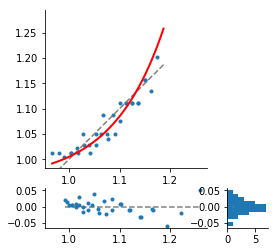

In [16]:
# Path to dataset
dataset = "weinreich"
path_data = "../datasets/" + dataset + ".json"

model = EpistasisPowerTransform.from_json(path_data, order=1, fix_linear=True, model_type="global")
model.fit(lmbda=-1, A=0, B=0)
print(model.parameters())

################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
plot.corr(model.predict_linear(), model.gpm.phenotypes, fig=fig, ax=ax_c)
# Add fitted model to plot
xmodel = np.linspace(min(model.predict_linear()), max(model.predict_linear()), 1000)
ymodel = model.function(xmodel, *model.parameters.get_params())
ax_c.plot(xmodel, ymodel, '-r', linewidth=2)

### residuals
plot.resid(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_r)

### histogram
plot.rhist(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_h)

## Data set IV

Data set IV was published as $\Delta G$s, but were given to us as $k_a$s. Before fitting with a nonlinear epistasis model, we converted the values to $\Delta G$s to be consistent with the literature.

{'A': -2.3363500098475281, 'B': 5.159015418639977, 'lmbda': 2.9275533704633534}


(<matplotlib.figure.Figure at 0x10cc7ab00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d31e3c8>)

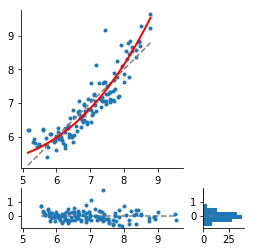

In [19]:
# Path to dataset
dataset = "anderson"
path_data = "../datasets/" + dataset + ".json"

# gas constant and temperature
R = 1.9872036e-3
T = 293

gpm = GenotypePhenotypeMap.from_json(path_data)
gpm.phenotypes = - np.log(gpm.phenotypes) * R * T 

model = EpistasisPowerTransform.from_gpm(gpm, order=1, fix_linear=True, model_type="global")
model.fit(lmbda=-1, A=0, B=0)
print(model.parameters())

################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
plot.corr(model.predict_linear(), model.gpm.phenotypes, fig=fig, ax=ax_c)
# Add fitted model to plot
xmodel = np.linspace(min(model.predict_linear()), max(model.predict_linear()), 1000)
ymodel = model.function(xmodel, *model.parameters.get_params())
ax_c.plot(xmodel, ymodel, '-r', linewidth=2)

### residuals
plot.resid(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_r)

### histogram
plot.rhist(model.predict(), model.gpm.phenotypes, fig=fig, ax=ax_h)